In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spicy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Columns of the dataset
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's


### Importing data

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, names=column_names, delimiter=r"\s+")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print(np.shape(data))

(506, 14)


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


As we can see ZN has 0 for 25th and 50th quantile[Not Useful] and CHAS is categorical feature and will not be useful in predicting MEDV

### Plotting a boxplot to check outliers of features

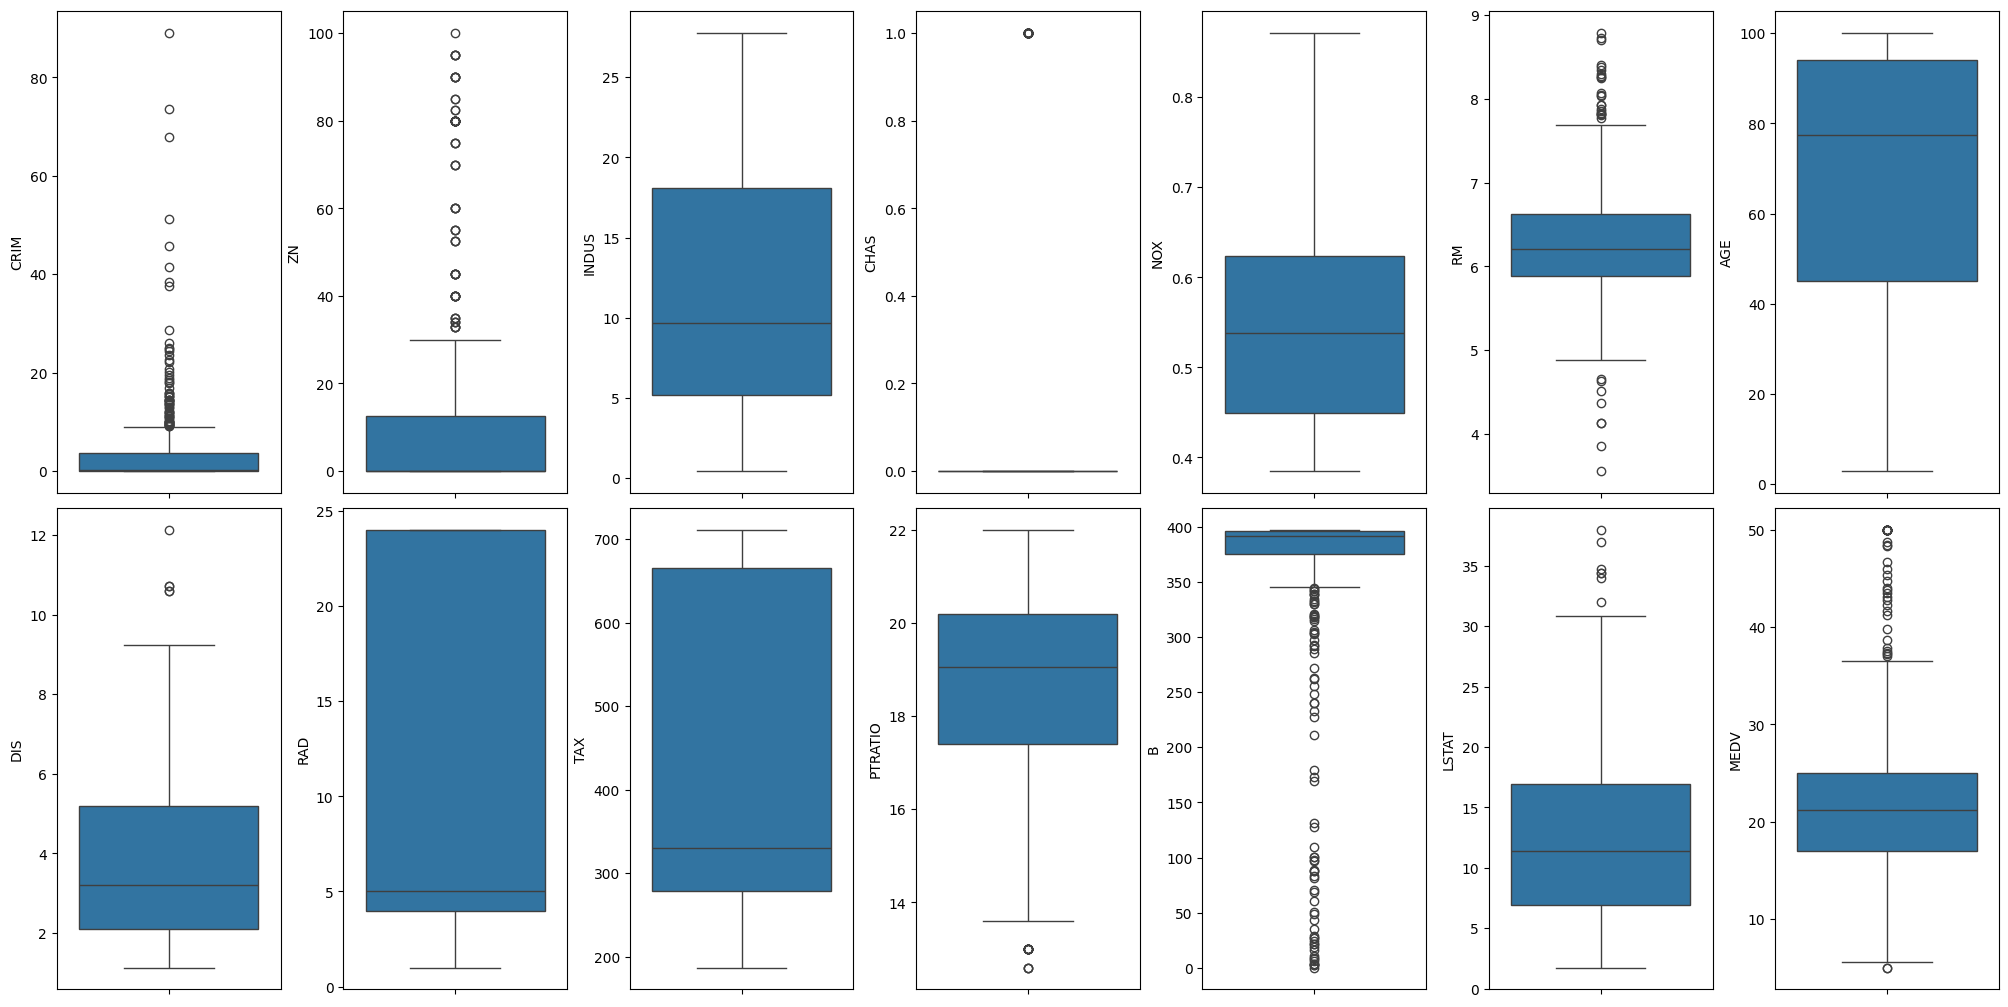

In [6]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, h_pad=0.5, w_pad=0.5)

We can see CRIM, ZN, RM, B has huge number of outliers, and MEDV has maximum number of 50.0, we need to remove the MEDV rows which have value greater than 50.0

Lets see the percentage of outliers in all the other columns

In [7]:
for k,v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print(f"Column {k} outliers = {perc:.2f}%")

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove the MEDV outliers which are >= 50

In [8]:
data = data[~(data['MEDV'] >= 50)]
data.shape

(490, 14)

Let's see the distributions of features with MEDV

C:\Users\goura\AppData\Local\Temp\ipykernel_10484\2996407694.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\goura\AppData\Local\Temp\ipykernel_10484\2996407694.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\goura\AppData\Local\Temp\

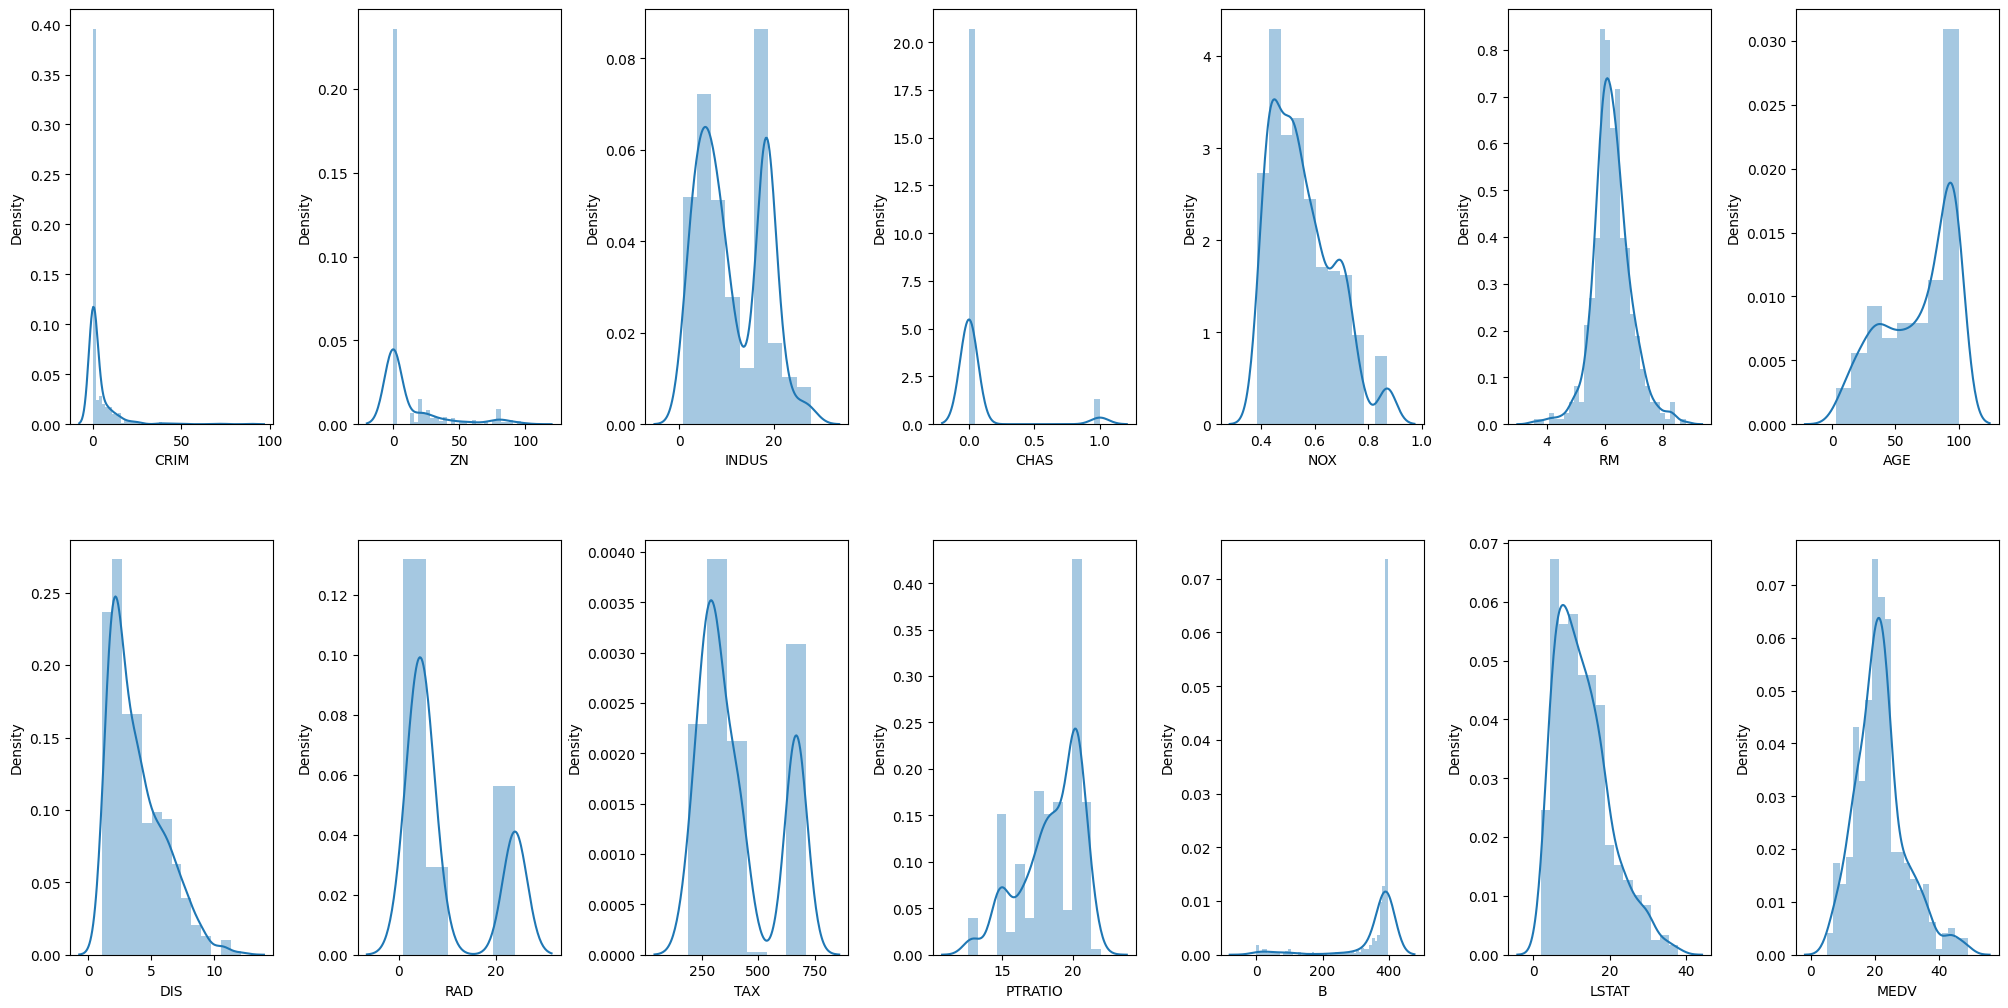

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, h_pad=5.0, w_pad=0.5)

We can see ZN, CRIM, and B have highly skewed distributions

Now we see the corelation of features using a heatmap for Feature Selection

<Axes: >

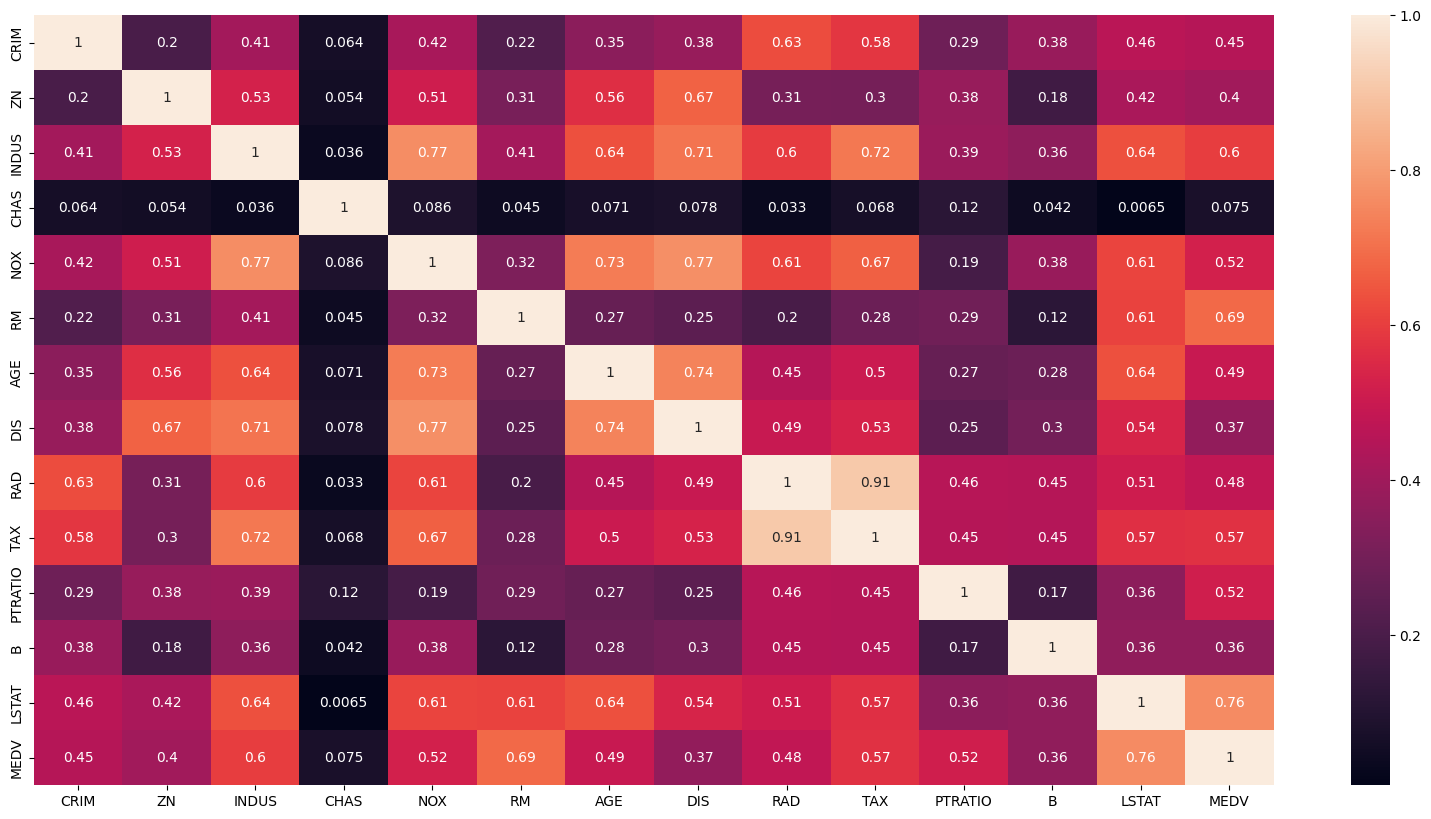

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(), annot=True)

We can see that TAX and RAD are highly corelated and features with corelation of >=0.5 with MEDV can be used to predict output of MEDV in the model which are ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'AGE', 'DIS']

Checking the previous mentioned featured with MEDV using regplot()

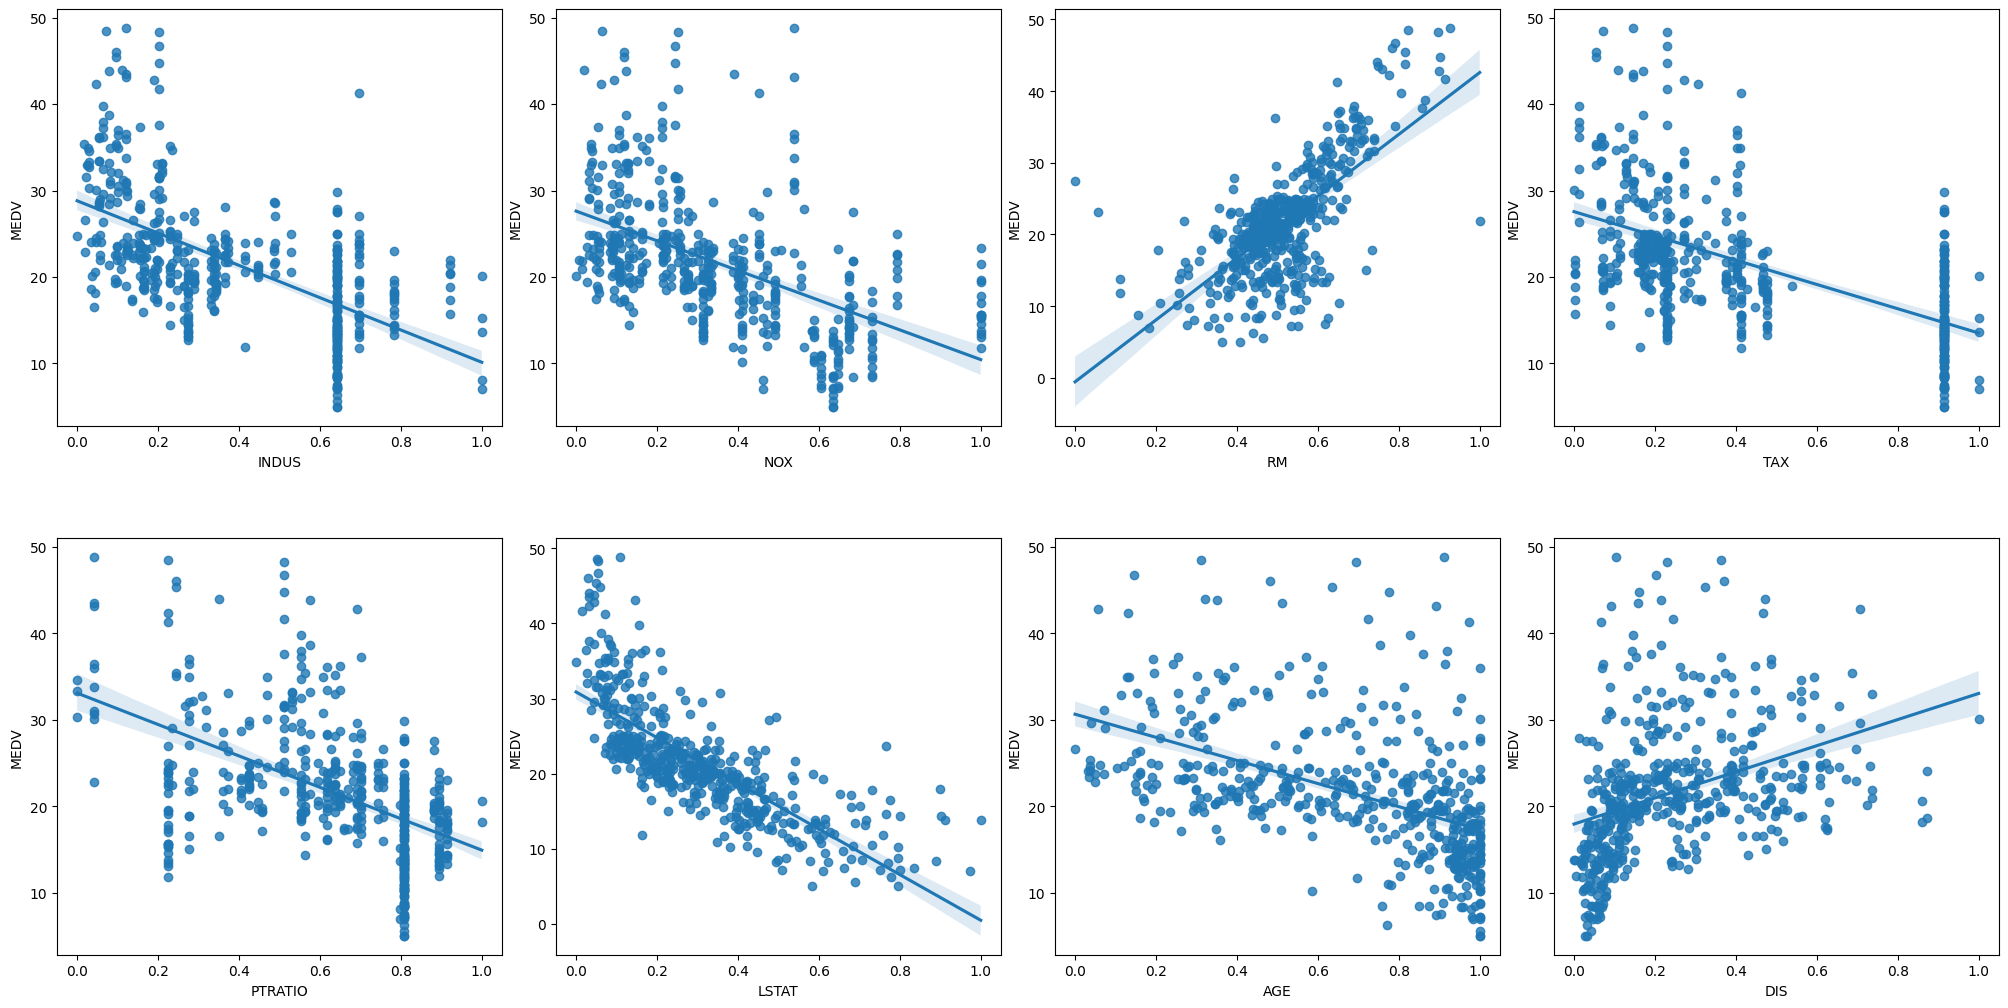

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'AGE', 'DIS']
x = data.loc[:, column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# plotting the regplots
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, h_pad=5.0, w_pad=0.5)

So with this analysis, we are going to use the above mentioned features to predict the house price in boston

Removing the skewness of data through log transformation

In [12]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_scaled = min_max_scaler.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.3)

In [15]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae


In [18]:
# Mean Squared Error
mse(y_test, y_pred)

0.03345045540564256

In [19]:
r2_score(y_test, y_pred)

0.7639398584185607

In [20]:
mae(y_test, y_pred)

0.13705549653350518

## Regression Tree Model

In [21]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

In [22]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [23]:
clf.score(x_train, y_train)

1.0

In [25]:
clf.score(x_test, y_test)

0.6740205024950774

We get a score of 67% without any hyperparameter tuning

Using hypeparameter tuning using GridSearchCV for finding the best parameters for regression tree

# Hyper Parameter Tuning

In [26]:
# hyperparameters for regression tree

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }